In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, r2_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Credit card fraud datasets
# https://drive.google.com/file/d/18r5se3h69Or5gEL9Rz79dBwKVdbqjNNE/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 18r5se3h69Or5gEL9Rz79dBwKVdbqjNNE

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From (original): https://drive.google.com/uc?id=18r5se3h69Or5gEL9Rz79dBwKVdbqjNNE
From (redirected): https://drive.google.com/uc?id=18r5se3h69Or5gEL9Rz79dBwKVdbqjNNE&confirm=t&uuid=ab7fedd0-4657-4319-8b8a-2e6248c032c9
To: /content/creditcard.csv
100% 151M/151M [00:03<00:00, 49.5MB/s]


In [ ]:
# problem 3.c
data = pd.read_csv('creditcard.csv')

In [ ]:
# data preprocesing
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data = pd.read_csv('creditcard.csv')
X = data.drop('Class', axis=1).values
y = data['Class'].values

<Axes: xlabel='Class', ylabel='count'>

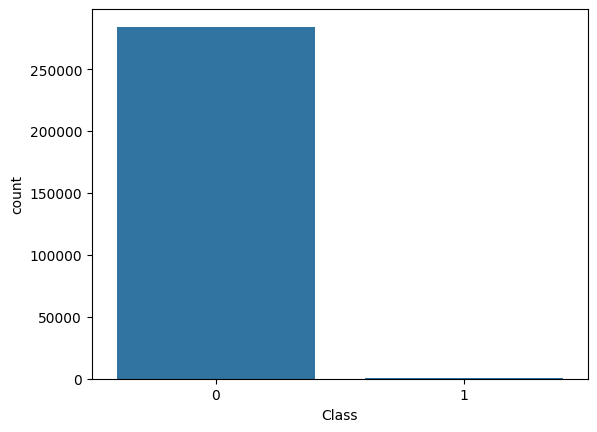

In [ ]:
sns.countplot(x='Class',data=data)

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=76)
X_resampled, y_resampled = smote.fit_resample(X, y)


<Axes: xlabel='Class', ylabel='count'>

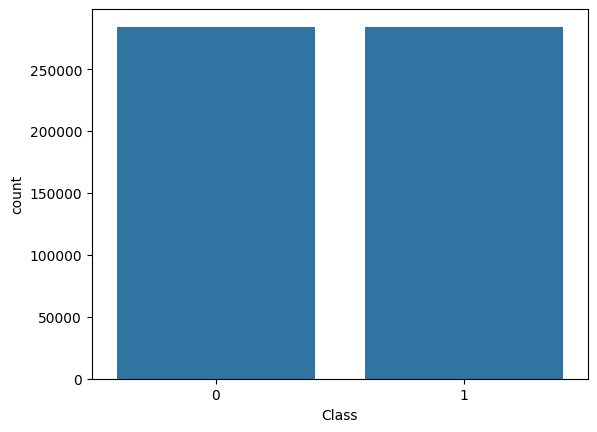

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=data.columns[:-1])
df_resampled['Class'] = y_resampled

sns.countplot(x='Class',data=df_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=16, stratify=y_resampled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
noise_factor = 0.2
X_train_noisy = X_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

**problem 3.d(د)**

Epoch 1/15
700/711 [============================>.] - ETA: 0s - loss: 0.9292
Epoch 1: val_loss improved from inf to 0.86496, saving model to best_autoencoder.h5
711/711 [==============================] - 3s 3ms/step - loss: 0.9282 - val_loss: 0.8650
Epoch 2/15
 70/711 [=>............................] - ETA: 1s - loss: 0.8524

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


710/711 [============================>.] - ETA: 0s - loss: 0.8582
Epoch 2: val_loss improved from 0.86496 to 0.85492, saving model to best_autoencoder.h5
711/711 [==============================] - 2s 3ms/step - loss: 0.8582 - val_loss: 0.8549
Epoch 3/15
706/711 [============================>.] - ETA: 0s - loss: 0.8517
Epoch 3: val_loss improved from 0.85492 to 0.85274, saving model to best_autoencoder.h5
711/711 [==============================] - 3s 4ms/step - loss: 0.8520 - val_loss: 0.8527
Epoch 4/15
696/711 [============================>.] - ETA: 0s - loss: 0.8513
Epoch 4: val_loss improved from 0.85274 to 0.85139, saving model to best_autoencoder.h5
711/711 [==============================] - 3s 4ms/step - loss: 0.8504 - val_loss: 0.8514
Epoch 5/15
696/711 [============================>.] - ETA: 0s - loss: 0.8463
Epoch 5: val_loss improved from 0.85139 to 0.84612, saving model to best_autoencoder.h5
711/711 [==============================] - 2s 3ms/step - loss: 0.8462 - val_loss: 0.

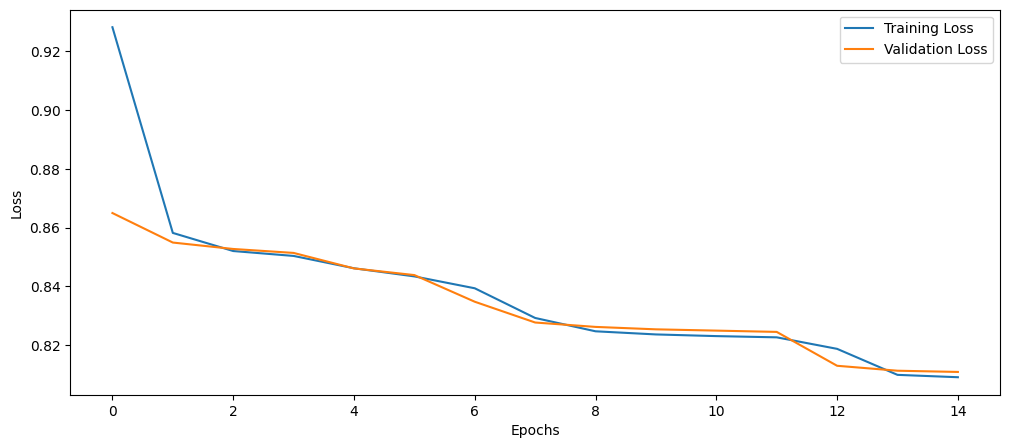

 --------------------------------------------classifier-------------------------------------------- 
Epoch 1/15
706/711 [============================>.] - ETA: 0s - loss: 0.1739 - accuracy: 0.9524
Epoch 1: val_loss improved from inf to 0.11886, saving model to best_classifier.h5
711/711 [==============================] - 3s 3ms/step - loss: 0.1736 - accuracy: 0.9524 - val_loss: 0.1189 - val_accuracy: 0.9590
Epoch 2/15
689/711 [============================>.] - ETA: 0s - loss: 0.1180 - accuracy: 0.9590
Epoch 2: val_loss improved from 0.11886 to 0.11368, saving model to best_classifier.h5
711/711 [==============================] - 2s 3ms/step - loss: 0.1179 - accuracy: 0.9591 - val_loss: 0.1137 - val_accuracy: 0.9606
Epoch 3/15
699/711 [============================>.] - ETA: 0s - loss: 0.1133 - accuracy: 0.9603
Epoch 3: val_loss improved from 0.11368 to 0.10997, saving model to best_classifier.h5
711/711 [==============================] - 2s 3ms/step - loss: 0.1133 - accuracy: 0.9603 - v

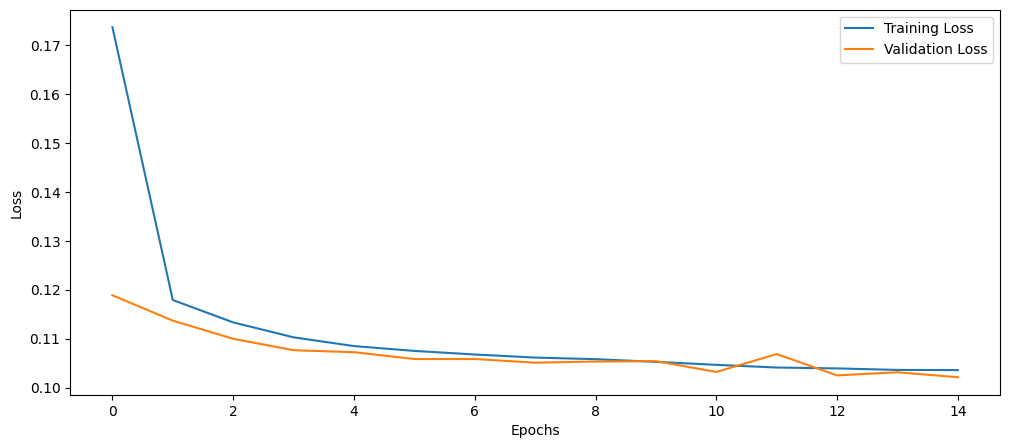


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



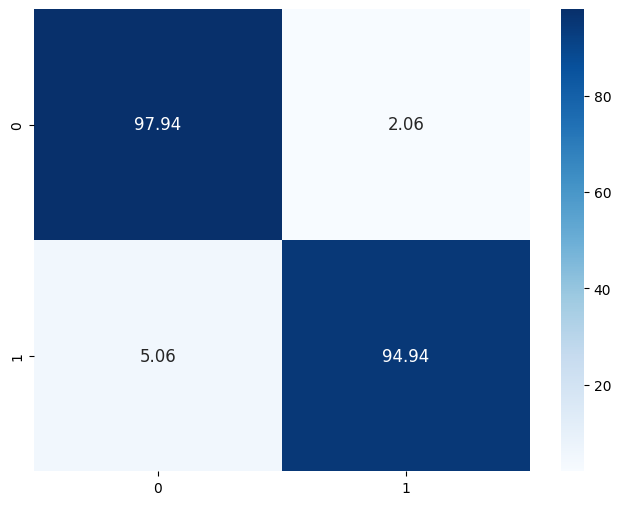

In [ ]:
input_dim = X_train_noisy.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoder1 = Dense(22, activation="relu")(input_layer)
encoder2 = Dense(15, activation="relu")(encoder1)
encoder3 = Dense(encoding_dim, activation="relu")(encoder2)

decoder4 = Dense(15, activation="relu")(encoder3)
decoder5 = Dense(22, activation="relu")(decoder4)
decoder6 = Dense(input_dim, activation="sigmoid")(decoder5)

autoencoder = Model(inputs=input_layer, outputs=decoder6)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

model_checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history_ae = autoencoder.fit(X_train_noisy, X_train_scaled,
                             epochs=15,
                             batch_size=512,
                             shuffle=True,
                             validation_split=0.2,
                             callbacks=[model_checkpoint,early_stopping])

autoencoder.load_weights('best_autoencoder.h5')

X_train_denoised = autoencoder.predict(X_train_noisy)
X_test_denoised = autoencoder.predict(X_test_noisy)

plt.figure(figsize=(12, 5))
plt.plot(history_ae.history['loss'], label='Train Loss')
plt.plot(history_ae.history['val_loss'], label='Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

print(" --------------------------------------------classifier-------------------------------------------- ")


input_layer = Input(shape=(input_dim,))
classifier = Dense(22, activation="relu")(input_layer)
classifier = Dense(15, activation="relu")(classifier)
classifier = Dense(10, activation="relu")(classifier)
classifier = Dense(5, activation="relu")(classifier)
classifier = Dense(2, activation="softmax")(classifier)

classifier_model = Model(inputs=input_layer, outputs=classifier)
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_checkpoint_classifier = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, verbose=1)

history_clf = classifier_model.fit(X_train_denoised, y_train,
                                   epochs=15,
                                   batch_size=512,
                                   shuffle=True,
                                   validation_split=0.2,
                                   callbacks=[model_checkpoint_classifier])

classifier_model.load_weights('best_classifier.h5')

y_pred = classifier_model.predict(X_test_denoised)
y_pred_classes = np.argmax(y_pred, axis=1)

rscore_1 = r2_score(y_test, y_pred_classes)
print("R2 Score: ", rscore_1)

plt.figure(figsize=(12, 5))
plt.plot(history_clf.history['loss'], label='Train Loss')
plt.plot(history_clf.history['val_loss'], label='Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred_classes)
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

class_report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:\n", class_report)

In [ ]:
print(X_test_denoised.shape)
print(y_pred.shape)
print(y_test.shape)


(113726, 30)
(113726, 2)
(113726,)


In [ ]:
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Accuracy: 0.96


**Problem 3.E(ه)**

Sampling Strategy: 1
Epoch 1/15
705/711 [============================>.] - ETA: 0s - loss: 0.9277
Epoch 1: val_loss improved from inf to 0.84441, saving model to best_autoencoder_1.h5
711/711 [==============================] - 3s 3ms/step - loss: 0.9270 - val_loss: 0.8444
Epoch 2/15
 74/711 [==>...........................] - ETA: 1s - loss: 0.8439

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


700/711 [============================>.] - ETA: 0s - loss: 0.8408
Epoch 2: val_loss improved from 0.84441 to 0.82007, saving model to best_autoencoder_1.h5
711/711 [==============================] - 2s 3ms/step - loss: 0.8406 - val_loss: 0.8201
Epoch 3/15
691/711 [============================>.] - ETA: 0s - loss: 0.8215
Epoch 3: val_loss improved from 0.82007 to 0.81041, saving model to best_autoencoder_1.h5
711/711 [==============================] - 2s 3ms/step - loss: 0.8213 - val_loss: 0.8104
Epoch 4/15
709/711 [============================>.] - ETA: 0s - loss: 0.8145
Epoch 4: val_loss improved from 0.81041 to 0.80659, saving model to best_autoencoder_1.h5
711/711 [==============================] - 3s 5ms/step - loss: 0.8144 - val_loss: 0.8066
Epoch 5/15
710/711 [============================>.] - ETA: 0s - loss: 0.8113
Epoch 5: val_loss improved from 0.80659 to 0.80412, saving model to best_autoencoder_1.h5
711/711 [==============================] - 5s 8ms/step - loss: 0.8113 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


513/534 [===========================>..] - ETA: 0s - loss: 0.8777
Epoch 2: val_loss improved from 0.89855 to 0.88961, saving model to best_autoencoder_0.5.h5
534/534 [==============================] - 2s 3ms/step - loss: 0.8781 - val_loss: 0.8896
Epoch 3/15
524/534 [============================>.] - ETA: 0s - loss: 0.8711
Epoch 3: val_loss improved from 0.88961 to 0.88310, saving model to best_autoencoder_0.5.h5
534/534 [==============================] - 2s 3ms/step - loss: 0.8707 - val_loss: 0.8831
Epoch 4/15
529/534 [============================>.] - ETA: 0s - loss: 0.8666
Epoch 4: val_loss improved from 0.88310 to 0.88105, saving model to best_autoencoder_0.5.h5
534/534 [==============================] - 2s 3ms/step - loss: 0.8665 - val_loss: 0.8810
Epoch 5/15
527/534 [============================>.] - ETA: 0s - loss: 0.8632
Epoch 5: val_loss improved from 0.88105 to 0.87916, saving model to best_autoencoder_0.5.h5
534/534 [==============================] - 1s 3ms/step - loss: 0.864

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


388/391 [============================>.] - ETA: 0s - loss: 0.9622
Epoch 2: val_loss improved from 0.96716 to 0.94448, saving model to best_autoencoder_0.1.h5
391/391 [==============================] - 2s 5ms/step - loss: 0.9615 - val_loss: 0.9445
Epoch 3/15
390/391 [============================>.] - ETA: 0s - loss: 0.9436
Epoch 3: val_loss improved from 0.94448 to 0.92862, saving model to best_autoencoder_0.1.h5
391/391 [==============================] - 2s 5ms/step - loss: 0.9440 - val_loss: 0.9286
Epoch 4/15
389/391 [============================>.] - ETA: 0s - loss: 0.9322
Epoch 4: val_loss improved from 0.92862 to 0.92238, saving model to best_autoencoder_0.1.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.9336 - val_loss: 0.9224
Epoch 5/15
391/391 [==============================] - ETA: 0s - loss: 0.9288
Epoch 5: val_loss improved from 0.92238 to 0.91957, saving model to best_autoencoder_0.1.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.928

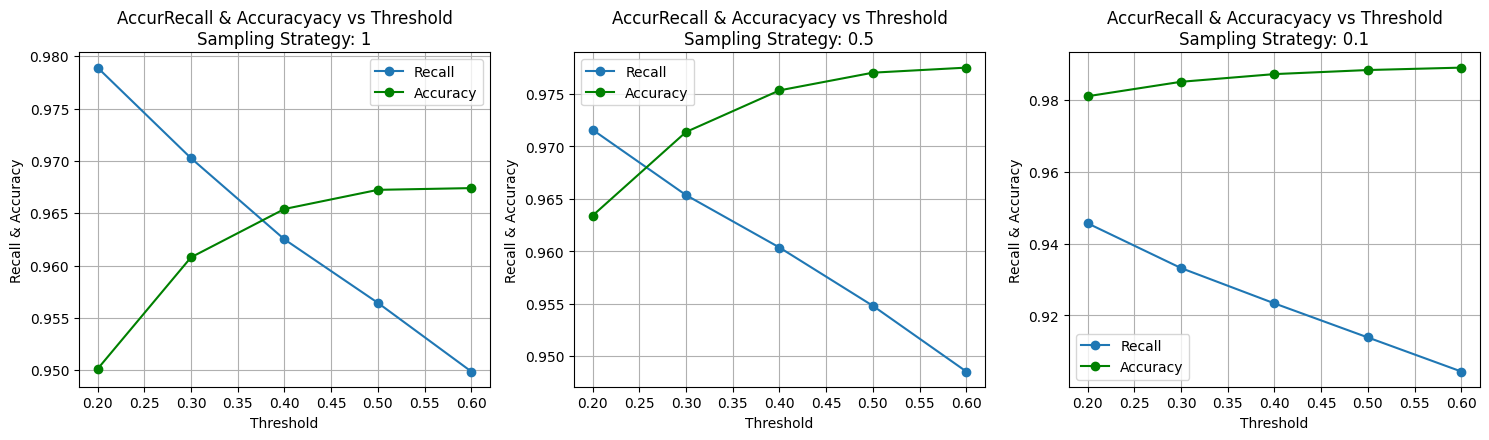

In [ ]:
sampling_strategies = [1, 0.5, 0.1]
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]

all_recall_scores = []
all_accuracy_scores = []

for strategy in sampling_strategies:
    print(f"Sampling Strategy: {strategy}")

    smote = SMOTE(sampling_strategy=strategy, random_state=76)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=76, stratify=y_resampled)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    noise_factor = 0.1
    X_train_noisy = X_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled.shape)
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    X_test_noisy = X_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled.shape)
    X_test_noisy = np.clip(X_test_noisy, 0., 1.)

    input_dim = X_train_noisy.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(22, activation="relu")(input_layer)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)

    decoder = Dense(15, activation="relu")(encoder)
    decoder = Dense(22, activation="relu")(decoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    model_checkpoint = ModelCheckpoint(f'best_autoencoder_{strategy}.h5', monitor='val_loss', save_best_only=True, verbose=1)

    history_ae = autoencoder.fit(X_train_noisy, X_train_scaled,
                                 epochs=15,
                                 batch_size=512,
                                 shuffle=True,
                                 validation_split=0.2,
                                 callbacks=[model_checkpoint])

    autoencoder.load_weights(f'best_autoencoder_{strategy}.h5')

    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    input_layer = Input(shape=(input_dim,))
    classifier = Dense(22, activation="relu")(input_layer)
    classifier = Dense(15, activation="relu")(classifier)
    classifier = Dense(10, activation="relu")(classifier)
    classifier = Dense(5, activation="relu")(classifier)
    classifier = Dense(2, activation="softmax")(classifier)

    classifier_model = Model(inputs=input_layer, outputs=classifier)
    classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model_checkpoint_classifier = ModelCheckpoint(f'best_classifier_{strategy}.h5', monitor='val_loss', save_best_only=True, verbose=1)

    history_clf = classifier_model.fit(X_train_denoised, y_train,
                                       epochs=15,
                                       batch_size=512,
                                       shuffle=True,
                                       validation_split=0.2,
                                       callbacks=[model_checkpoint_classifier])

    classifier_model.load_weights(f'best_classifier_{strategy}.h5')

    recall_scores = []
    accuracy_scores = []

    y_pred_prob = classifier_model.predict(X_test_denoised)

    for threshold in thresholds:
        y_pred_classes = (y_pred_prob[:, 1] >= threshold).astype(int)

        recall = recall_score(y_test, y_pred_classes)
        accuracy = accuracy_score(y_test, y_pred_classes)

        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    all_recall_scores.append(recall_scores)
    all_accuracy_scores.append(accuracy_scores)

plt.figure(figsize=(15, 8))

for idx, strategy in enumerate(sampling_strategies):
    plt.subplot(2, len(sampling_strategies), idx + 1)
    plt.plot(thresholds, all_recall_scores[idx], marker='o', linestyle='-', label='Recall')


    plt.plot(thresholds, all_accuracy_scores[idx], marker='o', linestyle='-', label='Accuracy', color='g')
    plt.title(f'AccurRecall & Accuracyacy vs Threshold\nSampling Strategy: {strategy}')
    plt.xlabel('Threshold')
    plt.ylabel('Recall & Accuracy')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Problem 3.F(و)

Epoch 1/15
347/357 [============================>.] - ETA: 0s - loss: 0.0366 - accuracy: 0.9982
Epoch 1: val_loss improved from inf to 0.00836, saving model to best_classifier.h5
357/357 [==============================] - 3s 5ms/step - loss: 0.0358 - accuracy: 0.9982 - val_loss: 0.0084 - val_accuracy: 0.9984
Epoch 2/15
 29/357 [=>............................] - ETA: 1s - loss: 0.0086 - accuracy: 0.9983

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


352/357 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9982
Epoch 2: val_loss improved from 0.00836 to 0.00582, saving model to best_classifier.h5
357/357 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0058 - val_accuracy: 0.9984
Epoch 3/15
336/357 [===========================>..] - ETA: 0s - loss: 0.0050 - accuracy: 0.9983
Epoch 3: val_loss improved from 0.00582 to 0.00503, saving model to best_classifier.h5
357/357 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 4/15
340/357 [===========================>..] - ETA: 0s - loss: 0.0042 - accuracy: 0.9983
Epoch 4: val_loss improved from 0.00503 to 0.00476, saving model to best_classifier.h5
357/357 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.9982 - val_loss: 0.0048 - val_accuracy: 0.9984
Epoch 5/15
350/357 [============================>.] - ETA: 0s - loss:

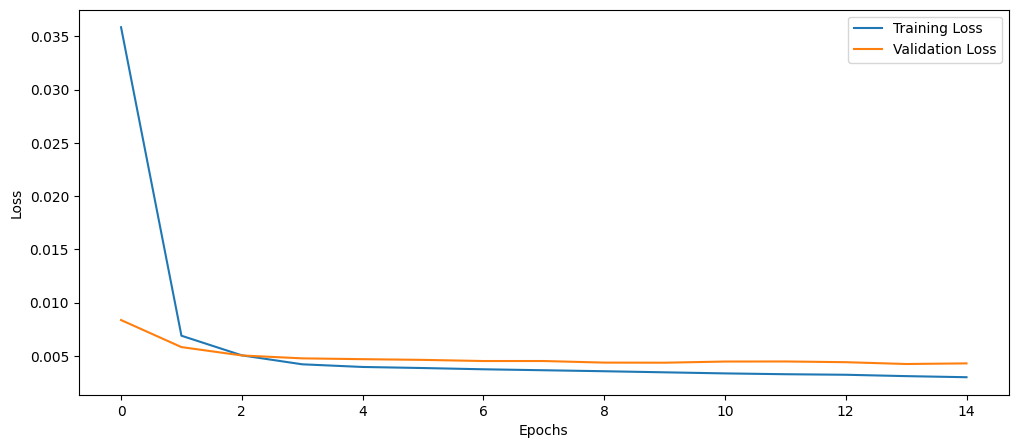


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.73      0.78        98

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



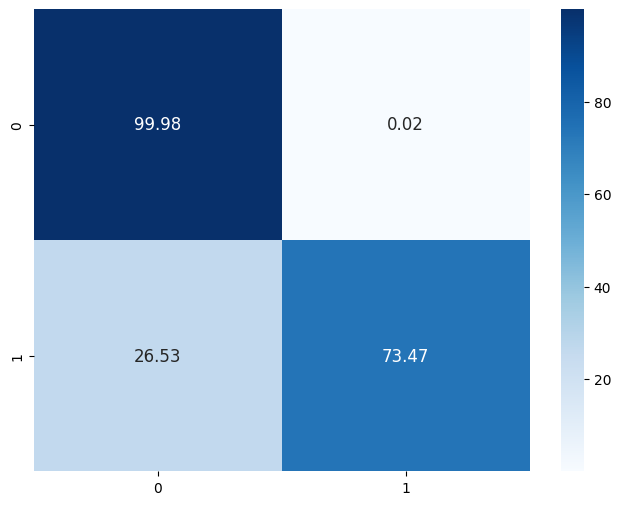

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
noise_factor = 0.2
X_train_noisy = X_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_scaled.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
input_dim = X_train.shape[1]
encoding_dim = 10
recall_scores1 = []
accuracy_scores1 = []

input_layer = Input(shape=(input_dim,))
classifier1 = Dense(22, activation="relu")(input_layer)
classifier2 = Dense(15, activation="relu")(classifier1)
classifier3 = Dense(10, activation="relu")(classifier2)
classifier4 = Dense(5, activation="relu")(classifier3)
classifier5 = Dense(2, activation="softmax")(classifier4)

classifier_model = Model(inputs=input_layer, outputs=classifier5)
classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_checkpoint_classifier = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, verbose=1)

history_clf = classifier_model.fit(X_train_noisy, y_train,
                                   epochs=15,
                                   batch_size=512,
                                   shuffle=True,
                                   validation_split=0.2,
                                   callbacks=[ model_checkpoint_classifier])

classifier_model.load_weights('best_classifier.h5')

y_pred = classifier_model.predict(X_test_noisy)
y_pred_classes = np.argmax(y_pred, axis=1)


recall1 = recall_score(y_test, y_pred_classes)
accuracy1 = accuracy_score(y_test, y_pred_classes)

recall_scores1.append(recall1)
accuracy_scores1.append(accuracy1)
rscore_1 = r2_score(y_test, y_pred_classes)
print("R2 Score: ", rscore_1)

plt.figure(figsize=(12, 5))
plt.plot(history_clf.history['loss'], label='Train Loss')
plt.plot(history_clf.history['val_loss'], label='Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred_classes)

cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

class_report = classification_report(y_test, y_pred_classes)
print("\nClassification Report:\n", class_report)